<a href="https://colab.research.google.com/github/babupallam/Supervised-Learning-Classification-Algorithms/blob/main/05_K_Nearest_Neighbors_(KNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbors (KNN)

### Overview:
  - It is used for both classification and regression tasks.
  - it can work with linear and non linear problems
  - It operates based on the principle that data points with similar attributes tend to belong to similar classes or have similar output values.
  
### How it works:

1. **Training Phase:**
   - KNN doesn’t explicitly train a model. Instead, it stores all available data points (feature vectors and their corresponding labels) in memory.

2. **Prediction Phase:**
   - For a given test point, KNN calculates the distance between the test point and all the stored training data points. The most commonly used distance metrics are Euclidean distance, Manhattan distance, and Minkowski distance.
   - It then identifies the 'k' nearest neighbors to the test point.
   - For classification, the test point is assigned to the class that is most common among its k nearest neighbors. For regression, the prediction is the average of the values of its k nearest neighbors.

### KNN in Non-Linear Algorithms:

- KNN is inherently non-parametric, meaning it doesn’t make any assumptions about the underlying data distribution, making it suitable for both linear and non-linear problems.
- When the decision boundary between classes is non-linear, KNN can still effectively classify the data by finding the nearest neighbors, regardless of the complexity of the boundary. Here’s how KNN adapts to non-linear scenarios:

1. **Decision Boundaries:**
   - Unlike linear models like logistic regression or SVM with linear kernels, KNN doesn’t try to find a global decision boundary. Instead, it works locally by examining the nearest neighbors, which allows it to model complex, non-linear boundaries.

2. **Locality and Flexibility:**
   - KNN's reliance on local data means it can adapt to various shapes of the decision boundary. For instance, in a scenario where the true decision boundary is highly non-linear (e.g., circular or spiral patterns), KNN can still correctly classify points by considering the proximity of neighboring points.

3. **Effect of 'k' on Non-Linear Decision Boundaries:**
   - The choice of 'k' plays a significant role in how well KNN handles non-linear boundaries. A small 'k' makes the algorithm sensitive to noise but captures the local structure well, making it suitable for non-linear decision boundaries. Conversely, a large 'k' smooths the decision boundary but might overlook complex, non-linear patterns.

4. **Dimensionality Considerations:**
   - High-dimensional spaces can make distance measures less informative, a phenomenon known as the "curse of dimensionality." In non-linear contexts, dimensionality reduction techniques (e.g., PCA, t-SNE) can be applied before using KNN to capture the underlying structure of the data more effectively.

### Applications in Non-Linear Contexts:
KNN is particularly useful in situations where the data exhibits non-linear characteristics. Examples include:

- **Pattern Recognition:**
  In tasks like image recognition or handwriting analysis, where the decision boundaries are highly complex, KNN can accurately classify objects based on the similarity of features.

- **Anomaly Detection:**
  In non-linear time series or sensor data, KNN can identify outliers by observing which points fall outside the expected proximity to their neighbors.

- **Complex Clustering:**
  KNN can be used as a baseline or in combination with other algorithms to help define clusters in non-linear data spaces.


# Demo

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


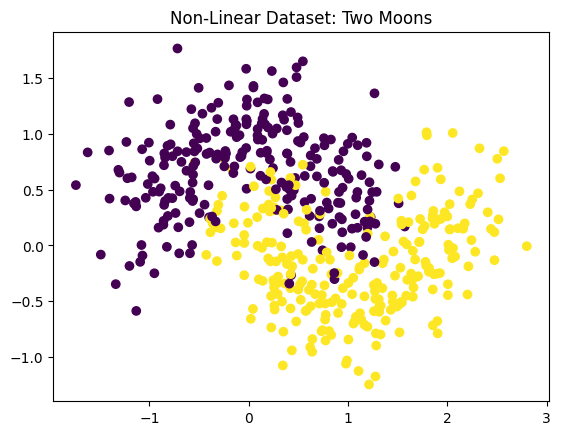

In [13]:
# Generate a dataset with 2 classes in a non-linear pattern
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Non-Linear Dataset: Two Moons")
plt.show()


In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [15]:
# Standardize the features (mean=0, variance=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [16]:
# Initialize and train the KNN classifier
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [17]:
# Predict the labels of the test set
y_pred = knn.predict(X_test)


In [18]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with k={k}: {accuracy:.2f}")

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy with k=5: 0.90
Confusion Matrix:
[[71  4]
 [11 64]]


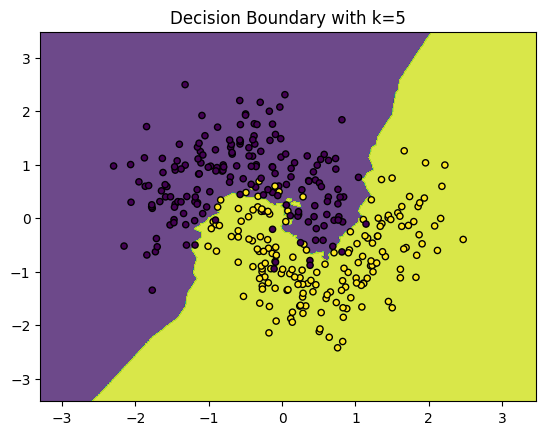

In [19]:
# Define a function to plot the decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.title(f"Decision Boundary with k={k}")
    plt.show()

# Plot the decision boundary
plot_decision_boundary(knn, X_train, y_train)


Accuracy with k=1: 0.87


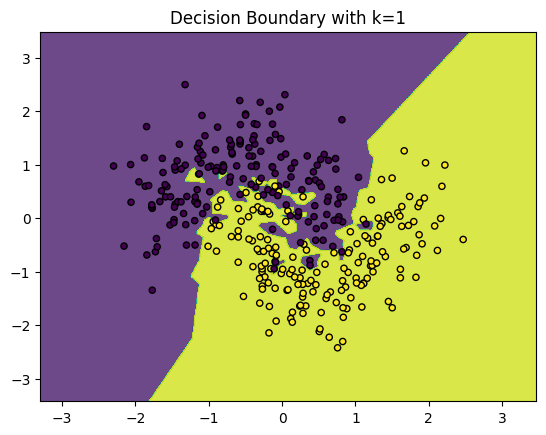

Accuracy with k=3: 0.88


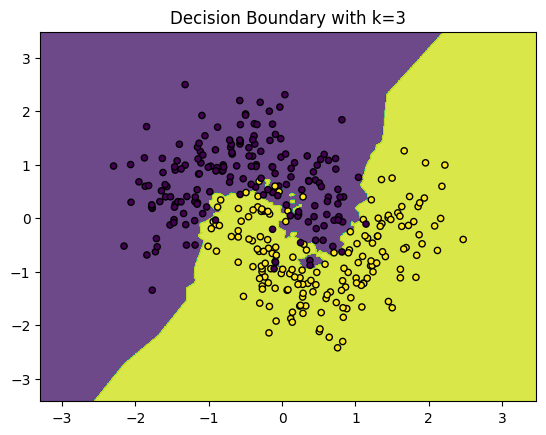

Accuracy with k=5: 0.90


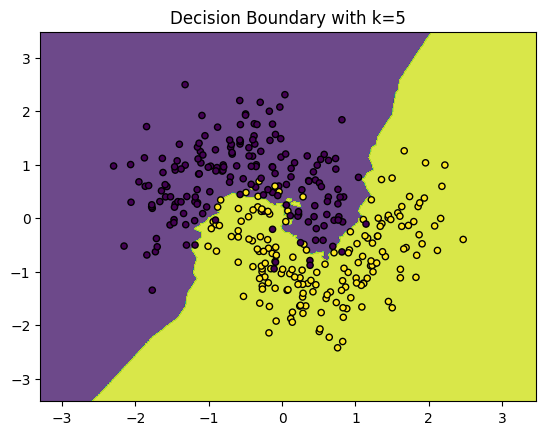

Accuracy with k=10: 0.89


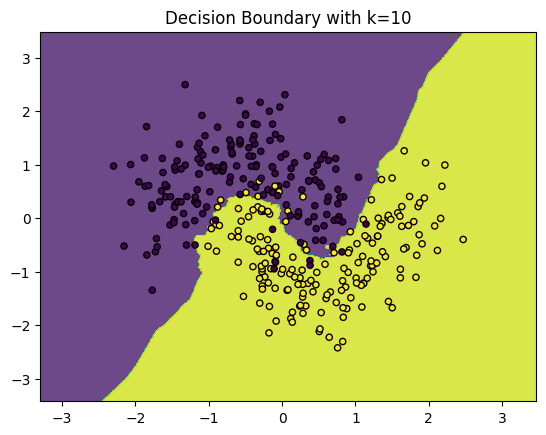

Accuracy with k=20: 0.91


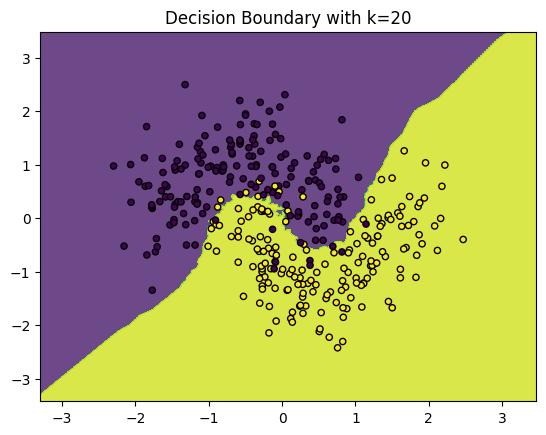

In [20]:
for k in [1, 3, 5, 10, 20]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with k={k}: {accuracy:.2f}")
    plot_decision_boundary(knn, X_train, y_train)


### testing the above trained model

In [21]:
# Example input data point (in the same feature space as the original data)
example_input = np.array([[0.5, 0.5]])

# Since the model was trained on standardized data, we need to standardize the input as well
example_input_scaled = scaler.transform(example_input)


In [22]:
# Predict the class of the example input
predicted_class = knn.predict(example_input_scaled)
print(f"Predicted class for input {example_input}: {predicted_class[0]}")


Predicted class for input [[0.5 0.5]]: 0


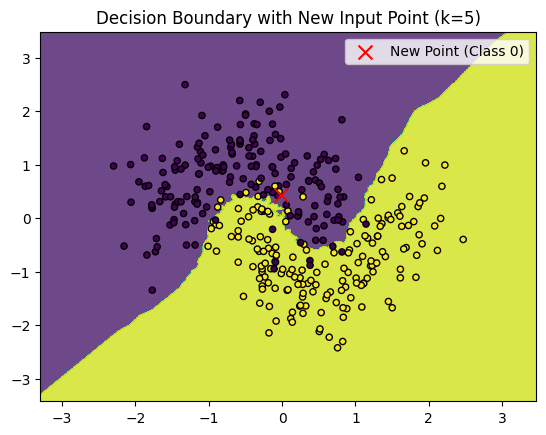

In [25]:
# Plot the decision boundary with the new input point

k=5
def plot_decision_boundary_with_input(model, X, y, input_point, input_label):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.scatter(input_point[:, 0], input_point[:, 1], c='red', marker='x', s=100, label=f'New Point (Class {input_label})')
    plt.title(f"Decision Boundary with New Input Point (k={k})")
    plt.legend()
    plt.show()

# Visualize the decision boundary with the new input point
plot_decision_boundary_with_input(knn, X_train, y_train, example_input_scaled, predicted_class[0])


# Applications of KNN

### 1. **Medical Diagnosis**
   - **Disease Prediction:** KNN is used in medical fields to predict the likelihood of a patient having a particular disease based on symptoms and medical history. For example, it can be used to predict whether a patient has diabetes or heart disease by comparing the patient's features (like age, blood pressure, cholesterol levels) to those of other patients with known diagnoses.
   - **Medical Image Classification:** KNN can be applied to classify medical images, such as distinguishing between benign and malignant tumors in mammograms or identifying different types of cells in pathology slides.

### 2. **Recommender Systems**
   - **Product Recommendation:** E-commerce platforms like Amazon and Netflix use KNN to recommend products or movies to users. The algorithm suggests items by finding users with similar tastes or behaviors and recommending what those users liked.
   - **Collaborative Filtering:** KNN is used in collaborative filtering techniques to predict a user’s preference for items (movies, books, etc.) based on the preferences of similar users.

### 3. **Text Classification**
   - **Spam Detection:** KNN can be used to classify emails as spam or not spam based on the content of the email. It compares the words in the new email to those in labeled emails to decide whether it’s spam.
   - **Document Classification:** KNN is used in text mining to classify documents into predefined categories. For example, it can classify news articles into topics like sports, politics, or technology by comparing them to labeled documents.

### 4. **Image Recognition and Classification**
   - **Handwriting Recognition:** KNN can be used to recognize handwritten characters by comparing new handwriting samples to a labeled dataset of characters. This is commonly used in postal code recognition and form digitization.
   - **Facial Recognition:** In security systems, KNN can be used to recognize faces by comparing the features of a new face image to a database of labeled images.

### 5. **Customer Segmentation**
   - **Marketing Campaigns:** Businesses use KNN to segment customers into different groups based on purchasing behavior, demographics, and preferences. This segmentation helps in targeting specific groups with personalized marketing campaigns.
   - **Churn Prediction:** KNN is used to predict customer churn by identifying customers who are likely to stop using a service, based on similarities to past customers who have already churned.

### 6. **Finance**
   - **Credit Scoring:** Banks and financial institutions use KNN to assess the creditworthiness of individuals by comparing a new applicant's financial history and characteristics to those of past applicants who were approved or denied credit.
   - **Fraud Detection:** KNN can detect fraudulent transactions by identifying transactions that are significantly different from normal transaction patterns.

### 7. **Anomaly Detection**
   - **Industrial Monitoring:** KNN is used in manufacturing and industrial processes to detect anomalies in sensor data, which could indicate equipment failure or other issues.
   - **Network Security:** In cybersecurity, KNN can detect network intrusions by identifying patterns in network traffic that deviate from the norm.

### 8. **Environmental Science**
   - **Weather Prediction:** KNN can be applied to predict weather conditions by analyzing historical weather data and finding similar patterns.
   - **Pollution Monitoring:** KNN is used in environmental monitoring to classify levels of pollution and predict future pollution levels based on historical data.

### 9. **Bioinformatics**
   - **Gene Expression Analysis:** KNN is used in bioinformatics to classify gene expression data, such as determining which genes are expressed in different conditions (e.g., healthy vs. diseased states).
   - **Protein Classification:** KNN helps in classifying proteins based on their sequences, structures, or functional similarities.

### 10. **Social Media Analysis**
   - **Sentiment Analysis:** KNN is used to analyze the sentiment of social media posts by classifying them as positive, negative, or neutral, based on the words and phrases used.
   - **User Behavior Analysis:** KNN can analyze social media behavior to categorize users based on their interactions, such as liking, sharing, or commenting on posts.


# Application 1: K-Nearest Neighbors (KNN) model for disease prediction


The `load_diabetes` dataset is a well-known dataset provided by `scikit-learn` that contains information relevant to diabetes progression. This dataset is often used in regression tasks and serves as a benchmark for evaluating machine learning models. Below are the details of the `load_diabetes` dataset:

### 1. **Dataset Description**
   - **Objective:** The dataset is used to predict the progression of diabetes in patients based on various medical attributes.
   - **Type:** Regression (although it can be adapted for classification, as shown in the earlier examples).
   - **Size:** The dataset contains 442 samples (rows) and 10 features (columns).

### 2. **Features**
The dataset has 10 baseline variables (features), all of which are numeric and continuous. These features have been standardized by removing the mean and scaling to unit variance. Each feature represents a different physiological measurement.

The features in the dataset are as follows:

1. **Age:** Age of the patient (normalized).
2. **Sex:** Gender of the patient (normalized).
3. **BMI:** Body Mass Index (BMI) of the patient (normalized).
4. **BP:** Average blood pressure (normalized).
5. **S1:** Total serum cholesterol level (normalized).
6. **S2:** Low-density lipoprotein (LDL) cholesterol level (normalized).
7. **S3:** High-density lipoprotein (HDL) cholesterol level (normalized).
8. **S4:** Total cholesterol/HDL ratio (normalized).
9. **S5:** Logarithm of serum triglycerides level (normalized).
10. **S6:** Blood sugar level (normalized).

### 3. **Target Variable**
   - **Progression of Diabetes (Y):** The target variable is a quantitative measure of disease progression one year after baseline. This is a continuous variable.

### 4. **Data Access**
You can load the dataset using the `load_diabetes` function from `sklearn.datasets`. This function returns a

In [35]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [36]:
# Load the diabetes dataset
data = load_diabetes() # This dataset includes various features such as age, blood pressure, BMI, and other blood test results.
X = data.data
y = data.target

# Convert the target variable to a binary classification (e.g., diabetes or no diabetes)
# For simplicity, we'll treat values above the median as "having diabetes" and below as "not having diabetes".
y = (y > np.median(y)).astype(int)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [37]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [38]:
# Initialize and train the KNN classifier
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [39]:
# Predict the labels of the test set
y_pred = knn.predict(X_test)


In [40]:
#Evaluation of the model


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with k={k}: {accuracy:.2f}")

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Display a detailed classification report
report = classification_report(y_test, y_pred, target_names=["No Diabetes", "Diabetes"])
print("Classification Report:")
print(report)


Accuracy with k=5: 0.71
Confusion Matrix:
[[52 20]
 [19 42]]
Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.73      0.72      0.73        72
    Diabetes       0.68      0.69      0.68        61

    accuracy                           0.71       133
   macro avg       0.70      0.71      0.71       133
weighted avg       0.71      0.71      0.71       133



testing the model

In [41]:
# Example feature values for a new patient (in the same order as the dataset features)
sample_input = np.array([[0.05, -0.04, 0.02, -0.03, 0.01, 0.1, -0.02, 0.03, -0.05, 0.06]])

# Since the model was trained on standardized data, we need to standardize this input as well
sample_input_scaled = scaler.transform(sample_input)


In [42]:
# Predict the class for the sample input
predicted_class = knn.predict(sample_input_scaled)
print(f"Predicted class for the sample input: {'Diabetes' if predicted_class[0] else 'No Diabetes'}")


Predicted class for the sample input: Diabetes


# Application 2:  Recommender Systems for Product Recommendation using the K-Nearest Neighbors (KNN) model.

In [43]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [44]:
# create a dataset

# Simulate a dataset where each row represents a user, and columns represent ratings for different products
# Ratings are on a scale of 1 to 5 (0 means the user hasn't rated that product)
np.random.seed(42)
user_data = np.array([
    [5, 3, 0, 1],
    [4, 0, 0, 1],
    [4, 0, 4, 3],
    [5, 0, 4, 0],
    [0, 3, 5, 0],
    [0, 4, 5, 2],
    [1, 2, 0, 5],
    [0, 3, 0, 4],
    [3, 0, 5, 4],
    [2, 1, 5, 4]
])

# Labels represent the most preferred product by the user (index of the highest rating)
user_labels = np.argmax(user_data, axis=1)

print("User Data (Ratings):")
print(user_data)
print("\nUser Labels (Most Preferred Product):")
print(user_labels)


User Data (Ratings):
[[5 3 0 1]
 [4 0 0 1]
 [4 0 4 3]
 [5 0 4 0]
 [0 3 5 0]
 [0 4 5 2]
 [1 2 0 5]
 [0 3 0 4]
 [3 0 5 4]
 [2 1 5 4]]

User Labels (Most Preferred Product):
[0 0 0 0 2 2 3 3 2 2]


In [46]:
# training the model

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(user_data, user_labels, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the KNN model
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [47]:
# test input with prediction

# Example input for a new user
new_user = np.array([[3, 0, 4, 0]])

# Standardize the input as well
new_user_scaled = scaler.transform(new_user)

# Predict the most preferred product for the new user
predicted_product = knn.predict(new_user_scaled)
print(f"Predicted most preferred product for the new user: {predicted_product[0]}")


Predicted most preferred product for the new user: 0


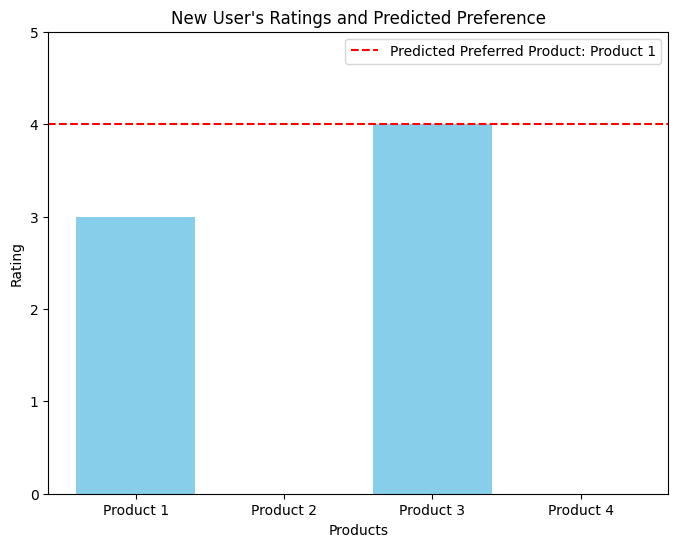

In [48]:
# Visualize the ratings and predicted product
plt.figure(figsize=(8, 6))
products = ['Product 1', 'Product 2', 'Product 3', 'Product 4']
plt.bar(products, new_user[0], color='skyblue')
plt.title(f"New User's Ratings and Predicted Preference")
plt.xlabel('Products')
plt.ylabel('Rating')
plt.ylim(0, 5)
plt.axhline(y=4, color='r', linestyle='--', label=f'Predicted Preferred Product: {products[predicted_product[0]]}')
plt.legend()
plt.show()


# Demo 2

In [50]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler


In [52]:
# create data set

# We'll create a simple dataset where rows represent users and columns represent products. The values indicate the ratings given by users to the products.

# Sample dataset (rows: users, columns: products)
data = {
    'Product_A': [5, 4, 1, 0, 0, 3, 4],
    'Product_B': [4, 5, 2, 1, 2, 0, 4],
    'Product_C': [4, 4, 3, 3, 3, 1, 5],
    'Product_D': [2, 2, 5, 4, 0, 3, 2],
    'Product_E': [1, 2, 3, 5, 4, 5, 1]
}

# Convert the dataset to a DataFrame
df = pd.DataFrame(data, index=['User_1', 'User_2', 'User_3', 'User_4', 'User_5', 'User_6', 'User_7'])
print(df)


        Product_A  Product_B  Product_C  Product_D  Product_E
User_1          5          4          4          2          1
User_2          4          5          4          2          2
User_3          1          2          3          5          3
User_4          0          1          3          4          5
User_5          0          2          3          0          4
User_6          3          0          1          3          5
User_7          4          4          5          2          1


In [53]:
# preprocessing

# Standardizing the data (if needed)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


In [54]:
# Train the KNN model
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(df_scaled)


NearestNeighbors(algorithm='brute', metric='cosine')

In [55]:
# Testing

#Recommend Products for a Specific User
#Let's assume we want to recommend products to User_4. We'll find the nearest neighbors to User_4 and then recommend products based on what these neighbors have liked that User_4 hasn't rated yet.

# Choose a user to make recommendations for
user_index = df.index.tolist().index('User_4')

# Find the k nearest neighbors for the chosen user
distances, indices = knn.kneighbors([df_scaled[user_index]], n_neighbors=3)

# Indices of nearest neighbors
print("Nearest neighbors (indices):", indices)

# Nearest neighbor indices (excluding the first one since it's the user itself)
neighbor_indices = indices.flatten()[1:]

# Combine the ratings of the neighbors
neighbor_ratings = df.iloc[neighbor_indices].mean(axis=0)
user_ratings = df.iloc[user_index]

# Recommend products the user hasn't rated yet
recommended_products = neighbor_ratings[user_ratings == 0].sort_values(ascending=False)
print("Recommended products for User_4:")
print(recommended_products)


Nearest neighbors (indices): [[3 2 5]]
Recommended products for User_4:
Product_A    2.0
dtype: float64


# Demo using *Tensorflow*

In [56]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [57]:
# Simulate a dataset of 100 users and their purchase history across 10 products
np.random.seed(42)
data = np.random.randint(2, size=(100, 10))  # Binary matrix (1 = purchased, 0 = not purchased)

# Target variable: Let's assume we're predicting whether a user will purchase a specific product
target_product = 7  # Product index to predict
y = data[:, target_product]
X = np.delete(data, target_product, axis=1)  # Features exclude the target product

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [59]:
#Define a KNN-like Model Using TensorFlow
#While TensorFlow is typically used for neural networks, we'll simulate a KNN by calculating distances and identifying the nearest neighbors using TensorFlow operations.

class KNN_TF:
    def __init__(self, k):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = tf.constant(X_train, dtype=tf.float32)
        self.y_train = tf.constant(y_train, dtype=tf.float32)

    def predict(self, X_test):
        X_test = tf.constant(X_test, dtype=tf.float32)
        predictions = []

        for test_point in X_test:
            # Calculate L2 (Euclidean) distance between the test point and all training points
            distances = tf.sqrt(tf.reduce_sum(tf.square(self.X_train - test_point), axis=1))

            # Get the indices of the k nearest neighbors
            top_k_indices = tf.argsort(distances)[:self.k]

            # Retrieve the labels of the nearest neighbors
            top_k_labels = tf.gather(self.y_train, top_k_indices)

            # Predict the class by majority voting
            prediction = tf.reduce_mean(top_k_labels)
            prediction = tf.round(prediction)
            predictions.append(prediction)

        return tf.stack(predictions).numpy()

# Initialize and train the KNN model
k = 3
knn_tf = KNN_TF(k=k)
knn_tf.fit(X_train, y_train)


In [60]:
# Make preductions

# Predict the labels for the test set
y_pred = knn_tf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with k={k}: {accuracy:.2f}")


Accuracy with k=3: 0.43


In [61]:
# Example predictions

# Example input: a new user's purchase history (excluding the target product)
example_input = np.array([[0, 1, 1, 0, 1, 0, 1, 1, 0]])  # Excluding the target product index (7)
example_input_scaled = scaler.transform(example_input)

# Predict whether the user would purchase the target product
predicted_class = knn_tf.predict(example_input_scaled)
print(f"Predicted class for the new input: {predicted_class[0]}")


Predicted class for the new input: 1.0
